# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [163]:
import pandas as pd
import numpy as np 
import random
import seaborn as sns
from matplotlib import pyplot as plt
import re
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [7]:
# your answer here
temp = pd.read_csv("Temp_States.csv",encoding = "ISO-8859-1")

#### Print `temp`

In [8]:
temp

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.info() # There are 2 types of data in this dataframe, the first 2 colums are objects (strings) and the 3rd column are floats


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   City         7 non-null      object 
 1   State        7 non-null      object 
 2   Temperature  7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 296.0+ bytes


#### Select the rows where state is New York

In [12]:
new_york = temp.loc[temp['State'] == 'New York']
new_york

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [14]:
new_york['Temperature'].mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [16]:
above_15 = temp.loc[temp['Temperature'] > 15]
above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [22]:
cities_above_15 = temp['City'].loc[temp['Temperature'] > 15]
cities_above_15

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [45]:
cities_15_20 = temp.loc[(temp['Temperature'] > 15) & (temp['Temperature'] < 20)]['City']
cities_15_20

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [70]:
mean_std = temp.groupby(['State']).agg({'Temperature': [np.mean, np.std]})
mean_std

Temperature          
                   mean       std
State                            
Connecticut   15.833333  1.964186
New Jersey    21.111111  1.571348
New York      10.740741  8.133404

# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [51]:
employee = pd.read_csv("Employee.csv",encoding = "ISO-8859-1")

#### Explore the data types of the Temp dataframe. Comment your results

In [54]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


In [55]:
employee.info() # There are 5 object type datas which are words (strings) and 2 datas of integer numbers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 632.0+ bytes


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

In [72]:
# Years' Histogram 
np.histogram(employee['Years'], bins=4)

(array([4, 2, 0, 3]), array([1.  , 2.75, 4.5 , 6.25, 8.  ]))

<function matplotlib.pyplot.show(close=None, block=None)>

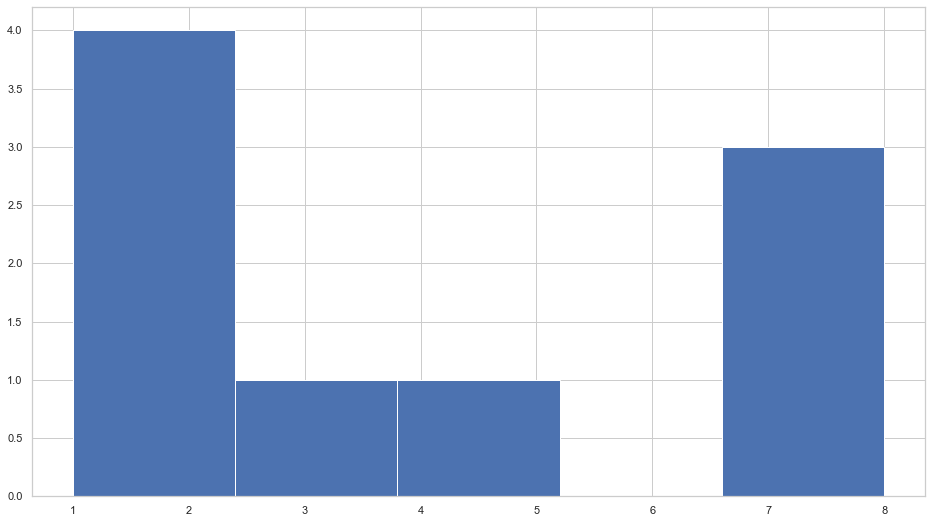

In [119]:
plt.hist(employee['Years'], bins="auto")
plt.show
# Most of the employees have been in the company either just 1 year (entry level) or between 7 and 8 (more senior level)

<function matplotlib.pyplot.show(close=None, block=None)>

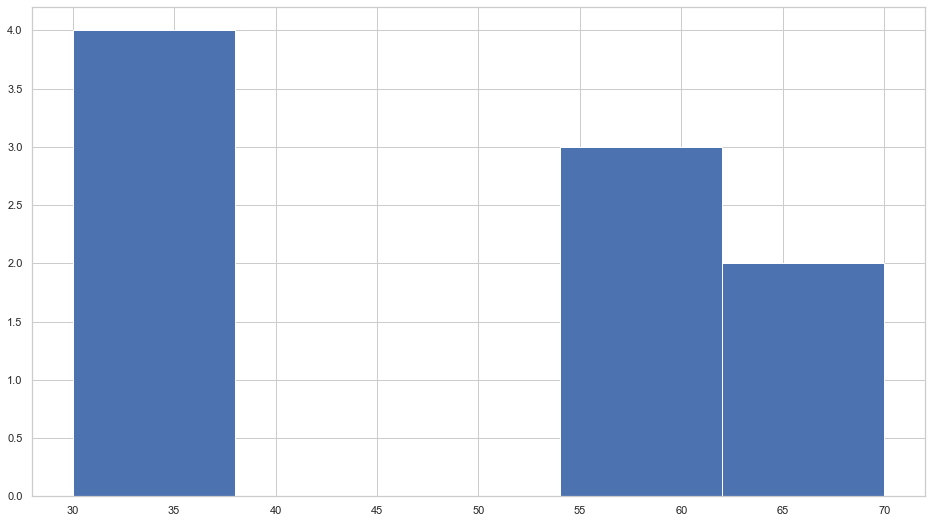

In [120]:
plt.hist(employee['Salary'], bins="auto")
plt.show 
# Related to the graph above, the salaries are distributed between junior levels or more senior level, with none salaries in the mid level

#### What's the average salary in this company?

In [77]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [78]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [79]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [81]:
employee['Salary'].min()

30

In [89]:
employee_low = employee[employee['Salary'] == employee['Salary'].min()]
employee_low

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [92]:
david = employee[employee['Name'] == 'David']
david

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [94]:
david_salary = employee['Salary'][employee['Name'] == 'David']
david_salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [96]:
associates = employee[employee['Title'] == 'associate']
associates

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [98]:
# your answer here- 1 method
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [104]:
# your answer here- 2nd method
first_3 = employee[employee.index < 3]
first_3

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [107]:
# your answer here
associate_55 = employee[(employee['Title'] == 'associate') & (employee['Salary'] > 55)]
associate_55

,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [113]:
# your answer here
group = employee.groupby(['Years']).agg({'Salary': 'mean'})
group

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [114]:
employee.groupby(['Title']).agg({'Salary': 'mean'})

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

<AxesSubplot:xlabel='Salary'>

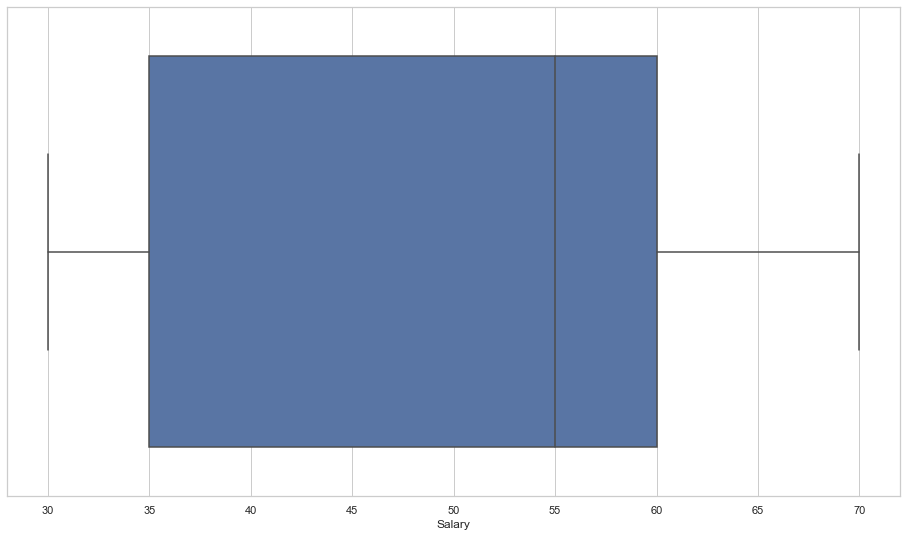

In [118]:
sns.boxplot(x = 'Salary', data = employee)

In [123]:
employee['Salary'].quantile(0.25)

35.0

In [124]:
employee['Salary'].quantile(0.75)

60.0

#### Is the mean salary per gender different?

In [125]:
employee.groupby(['Gender']).agg({'Salary': 'mean'})
# Yes, females gain less salary than males

,Salary
Gender,
F,47.5
M,50.0


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [133]:
employee.groupby(['Department']).agg({'Years': [np.mean, np.max, np.min], 'Salary': [np.mean, np.max, np.min]}).reset_index()


Department     Years           Salary          
                  mean amax amin   mean amax amin
0         HR  4.666667    8    2  45.00   70   30
1         IT  4.500000    8    1  48.75   70   30
2      Sales  2.500000    3    2  55.00   55   55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [132]:
employee.groupby(['Department']).agg({'Salary': ['mean', 'max', 'min', lambda x: max(x) - min(x)]})


Salary                   
             mean max min <lambda_0>
Department                          
HR          45.00  70  30         40
IT          48.75  70  30         40
Sales       55.00  55  55          0

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [136]:
orders = pd.read_csv("Orders.csv",encoding = "ISO-8859-1")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [144]:
orders.sample(5)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
334131,454340,575517,23298,2011,11,4,10,spotty bunting,3,2011-11-10 10:49:00,4.95,14562,United Kingdom,14.85
310687,424531,573269,23389,2011,10,5,13,spaceboy mini backpack,2,2011-10-28 13:00:00,4.15,16764,United Kingdom,8.30
32594,52572,540801,21891,2011,1,2,12,traditional wooden skipping rope,12,2011-01-11 12:25:00,1.25,12540,Spain,15.00
351487,477228,577052,85123A,2011,11,4,14,white hanging heart t-light holder,5,2011-11-17 14:08:00,2.95,17397,United Kingdom,14.75
393569,534093,581133,20931,2011,12,3,12,blue pot plant candle,12,2011-12-07 12:55:00,1.25,14904,United Kingdom,15.00


In [138]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 42.5+ MB


In [139]:
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


####  What is the average Purchase Price?

In [140]:
orders['UnitPrice'].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [142]:
# Lowest price = 0.0 as shown in the table above
orders['UnitPrice'].min()

0.0

In [143]:
orders['UnitPrice'].max()

8142.75

#### Select all the customers we have in Spain

In [177]:
spain = orders[orders['Country'] == 'Spain']
spain.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
91157,136769,547972,20727,2011,3,1,16,lunch bag black skull.,50,2011-03-28 16:41:00,1.65,12557,Spain,82.5
293645,404031,571665,22553,2011,10,2,12,plasters in tin skulls,12,2011-10-18 12:59:00,1.65,12540,Spain,19.8
254103,355758,567968,20977,2011,9,5,9,36 pencils tube woodland,16,2011-09-23 09:44:00,1.25,12546,Spain,20.0


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [155]:
orders.value_counts(orders['Country'] == 'Spain')
# Customers in Spain = 2485

Country
False    395439
True       2485
dtype: int64

#### Select all the customers who have bought more than 50 items ?

In [159]:
orders[orders['Quantity'] > 50].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
283954,391628,570674,22944,2011,10,2,14,christmas metal postcard with bells,72,2011-10-11 14:59:00,0.39,14911,EIRE,28.08
265680,369673,569084,22941,2011,9,5,11,christmas lights 10 reindeer,384,2011-09-30 11:56:00,6.50,17949,United Kingdom,2496.00
108886,159440,550334,22151,2011,4,7,14,place setting white heart,72,2011-04-17 14:09:00,0.42,17320,United Kingdom,30.24


#### Select orders from Spain that are above 50 items

In [158]:
orders[(orders['Country'] == 'Spain') & (orders['Quantity'] > 50)].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
366326,495739,578321,20728,2011,11,3,16,lunch bag cars blue,200,2011-11-23 16:59:00,1.45,12557,Spain,290.0
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
224881,315702,564734,84826,2011,8,7,13,asstd design 3d paper stickers,60,2011-08-28 13:32:00,0.85,12484,Spain,51.0


#### Select all free orders

In [162]:
orders[orders['UnitPrice'] == 0].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
256263,358655,568158,PADS,2011,9,7,12,pads to match all cushions,1,2011-09-25 12:22:00,0.0,16133,United Kingdom,0.0
273926,379913,569716,22778,2011,10,4,8,glass cloche small,2,2011-10-06 08:17:00,0.0,15804,United Kingdom,0.0
199711,285657,561916,M,2011,8,1,11,manual,1,2011-08-01 11:44:00,0.0,15581,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [173]:
orders[orders.Description.str.contains('lunch bag')].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
86963,131775,547647,22384,2011,3,4,11,lunch bag pink polkadot,10,2011-03-24 11:43:00,1.65,15144,United Kingdom,16.50
209534,298644,563031,23208,2011,8,4,14,lunch bag vintage leaf design,1,2011-08-11 14:38:00,1.65,13263,United Kingdom,1.65
177061,253769,559171,22384,2011,7,4,8,lunch bag pink polkadot,10,2011-07-07 08:21:00,1.65,17651,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [175]:
orders[(orders['year'] == 2011) & (orders.Description.str.contains('lunch bag'))].sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
321047,438035,574304,20727,2011,11,4,16,lunch bag black skull.,3,2011-11-03 16:30:00,1.65,14428,United Kingdom,4.95
262374,365386,568703,23209,2011,9,3,15,lunch bag vintage doily,4,2011-09-28 15:21:00,1.65,12748,United Kingdom,6.60
360949,488991,577861,23209,2011,11,2,11,lunch bag vintage doily,10,2011-11-22 11:28:00,1.65,13924,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

<function matplotlib.pyplot.show(close=None, block=None)>

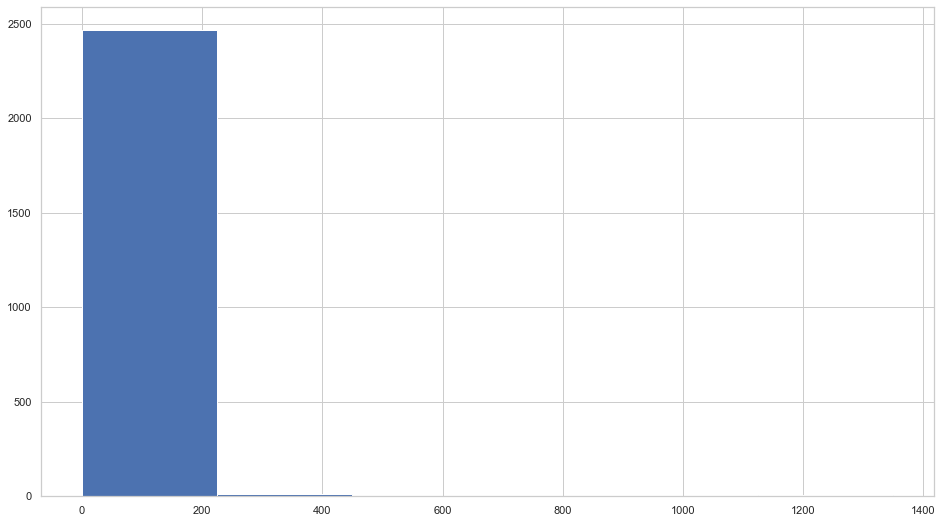

In [180]:
plt.hist(spain['amount_spent'], bins=6)
plt.show

#### Select all orders made in the month of August

In [193]:
august = orders[orders['month'] == 8]
august.sample(3)

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
202323,288953,562214,23321,2011,8,3,13,small white heart of wicker,12,2011-08-03 13:39:00,1.65,17731,United Kingdom,19.8
219953,310159,564167,23343,2011,8,2,13,jumbo bag vintage christmas,10,2011-08-23 13:50:00,2.08,17735,United Kingdom,20.8
225362,316188,564749,22554,2011,8,2,8,plasters in tin woodland animals,12,2011-08-30 08:15:00,1.65,12708,Germany,19.8


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [198]:
august.groupby('Country').agg({'Quantity': 'count'})

,Quantity
Country,
Australia,107
Austria,88
Belgium,194
Canada,5
Channel Islands,140
Denmark,16
EIRE,593
Finland,61
France,569


#### What's the  average amount of money spent by country

In [199]:
orders.groupby('Country').agg({'amount_spent': 'mean'})

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [201]:
orders['Description'][orders['UnitPrice'] == orders['UnitPrice'].max()]

118352    postage
Name: Description, dtype: object

#### What was the average amount spent per year ?

In [202]:
orders.groupby('year').agg({'amount_spent': 'mean'})

,amount_spent
year,
2010,21.892733
2011,22.430074
